## Project Week04

Yilun Wu (yw528)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t
from statsmodels.tsa.arima.model import ARIMA

### Problem 1

In [2]:
# Generate random normal distribution r_t
p, mu, sigma = 100, 0, 0.5
np.random.seed(545)
r_t = np.random.normal(mu, sigma, 1000)

In [3]:
# Simulate Classical Brownian Motion
p_t_classic = p+r_t
print("Mean of Classical Brownian Motion: ", np.mean(p_t_classic))
print("Standard deviation of Classical Brownian Motion: ", np.std(p_t_classic))

Mean of Classical Brownian Motion:  100.0239004302006
Standard deviation of Classical Brownian Motion:  0.484160386042029


In [4]:
# Simulate Arithmetic Return System
p_t_arithmetic = p*(1+r_t)
print("Mean of Arithmetic Return System: ", np.mean(p_t_arithmetic))
print("Standard deviation of Arithmetic Return System: ", np.std(p_t_arithmetic))

Mean of Arithmetic Return System:  102.3900430200595
Standard deviation of Arithmetic Return System:  48.4160386042029


In [5]:
# Simulate Log Return or Geometric Brownian Motion
p_t_log = p*np.exp(r_t)
print("Mean of Log Return or Geometric Brownian Motion: ", np.mean(p_t_log))
print("Standard deviation of Log Return or Geometric Brownian Motion: ", np.std(p_t_log))

Mean of Log Return or Geometric Brownian Motion:  115.05059335930741
Standard deviation of Log Return or Geometric Brownian Motion:  58.14812183201213


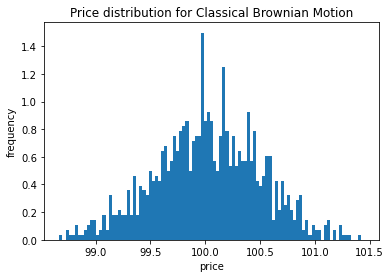

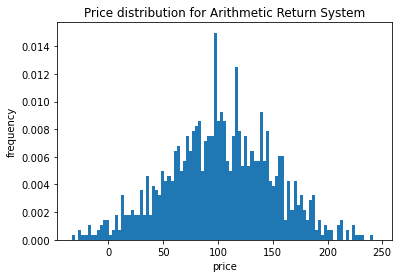

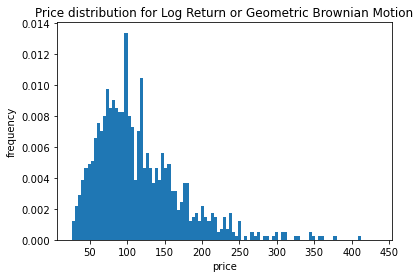

In [6]:
# Visualization
prices = [p_t_classic, p_t_arithmetic, p_t_log]
price_names = ['Classical Brownian Motion', 'Arithmetic Return System', 'Log Return or Geometric Brownian Motion']
for i in range(len(prices)):
    price = prices[i]
    price_name = price_names[i]
    plt.hist(price, bins=np.arange(min(price), max(price), (max(price)-min(price))/100), density=True)
    plt.xlabel('price')
    plt.ylabel('frequency')
    plt.title(f'Price distribution for {price_name}')
    plt.show()

### Problem 2

In [7]:
# Implement a function similar to the “return_calculate()” in this week’s code. 
# Allow the user to specify the method of return calculation.
def return_calculate(prices, method="DISCRETE", dateColumn="Date"):
    vars = prices.columns
    nVars = len(vars)
    vars = vars[vars != dateColumn]
    if nVars == len(vars):
        raise ValueError(f"dateColumn: {dateColumn} not in DataFrame: {vars}")
    nVars = nVars-1

    p = prices[vars].to_numpy()
    n, m = p.shape
    p2 = np.empty((n-1, m))

    for i in range(n-1):
        for j in range(m):
            p2[i, j] = p[i+1, j] / p[i, j]

    if method.upper() == "DISCRETE":
        p2 = p2-1.0
    elif method.upper() == "LOG":
        p2 = np.log(p2)
    else:
        raise ValueError(f"method: {method} must be in (\"LOG\",\"DISCRETE\")")

    dates = prices[dateColumn].iloc[1:n].to_numpy()
    out = pd.DataFrame({dateColumn: dates})
    for i in range(nVars):
        out[vars[i]] = p2[:, i]

    return out


In [8]:
# Read data from csv file
dailyPrices = pd.read_csv('DailyPrices.csv')
dailyPrices

,Date,SPY,AAPL,MSFT,AMZN,NVDA,GOOGL,TSLA,GOOG,BRK-B,...,CI,ETN,SLB,PGR,SCHW,LRCX,ZTS,C,BSX,AMT
0,2022-09-01,388.679565,157.028442,257.908386,127.820000,139.243423,109.739998,277.160004,110.550003,282.429993,...,282.124664,136.138718,36.036259,123.325203,70.653595,424.766022,158.011505,46.662727,40.990002,249.972107
1,2022-09-02,384.581177,154.891113,253.609909,127.510002,136.346054,107.849998,270.209991,108.680000,277.670013,...,281.791626,134.696564,37.229321,122.039116,69.294113,422.966797,155.602798,46.748875,40.490002,243.384186
2,2022-09-06,383.130066,153.618668,250.826813,126.110001,134.527710,106.809998,274.420013,107.480003,276.589996,...,280.483856,135.834595,36.703716,122.108894,69.422180,419.574921,155.464035,46.155418,40.380001,246.615067
3,2022-09-07,390.013000,155.040237,255.620483,129.479996,137.056152,109.449997,283.700012,110.480003,281.040009,...,285.154480,138.591293,36.408989,126.814598,70.722557,424.726715,158.992813,46.547867,41.470001,251.776749
4,2022-09-08,392.562256,153.549088,256.046387,129.820007,139.814484,108.379997,289.260010,109.419998,283.339996,...,285.852631,140.523956,37.499485,128.828476,72.072182,431.766174,157.099579,47.763493,42.709999,253.882172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2023-09-18,443.630005,177.970001,329.059998,139.979996,439.660004,138.210007,265.279999,138.960007,370.429993,...,285.339996,219.149994,61.209999,140.559998,57.860001,635.650024,179.649994,42.639999,53.000000,179.529999
262,2023-09-19,442.709991,179.070007,328.649994,137.630005,435.200012,138.039993,266.500000,138.830002,370.480011,...,284.640015,216.160004,60.430000,142.470001,57.730000,625.150024,181.979996,42.680000,53.029999,177.360001
263,2023-09-20,438.640015,175.490005,320.769989,135.289993,422.390015,133.740005,262.589996,134.589996,366.820007,...,287.329987,214.649994,59.790001,142.690002,56.669998,618.859985,181.479996,42.299999,54.099998,177.410004
264,2023-09-21,431.390015,173.929993,319.529999,129.330002,410.170013,130.440002,255.699997,131.360001,363.279999,...,290.839996,210.649994,58.820000,142.399994,56.009998,610.390015,176.630005,41.709999,53.970001,169.320007


In [9]:
# Calculate the arithmetic returns for all prices.
dailyReturns = return_calculate(dailyPrices)
dailyReturns

/var/folders/rj/ltb_h3dn55jbxjk2_5f94x9r0000gn/T/ipykernel_5173/3656648412.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[vars[i]] = p2[:, i]
/var/folders/rj/ltb_h3dn55jbxjk2_5f94x9r0000gn/T/ipykernel_5173/3656648412.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[vars[i]] = p2[:, i]


,Date,SPY,AAPL,MSFT,AMZN,NVDA,GOOGL,TSLA,GOOG,BRK-B,...,CI,ETN,SLB,PGR,SCHW,LRCX,ZTS,C,BSX,AMT
0,2022-09-02,-0.010544,-0.013611,-0.016667,-0.002425,-0.020808,-0.017223,-0.025076,-0.016915,-0.016854,...,-0.001180,-0.010593,0.033107,-0.010428,-0.019242,-0.004236,-0.015244,0.001846,-0.012198,-0.026355
1,2022-09-06,-0.003773,-0.008215,-0.010974,-0.010980,-0.013336,-0.009643,0.015581,-0.011042,-0.003890,...,-0.004641,0.008449,-0.014118,0.000572,0.001848,-0.008019,-0.000892,-0.012695,-0.002717,0.013275
2,2022-09-07,0.017965,0.009254,0.019111,0.026723,0.018795,0.024717,0.033817,0.027912,0.016089,...,0.016652,0.020295,-0.008030,0.038537,0.018731,0.012279,0.022698,0.008503,0.026994,0.020930
3,2022-09-08,0.006536,-0.009618,0.001666,0.002626,0.020126,-0.009776,0.019598,-0.009595,0.008184,...,0.002448,0.013945,0.029951,0.015880,0.019083,0.016574,-0.011908,0.026116,0.029901,0.008362
4,2022-09-09,0.015535,0.018840,0.022977,0.026575,0.028377,0.020945,0.036023,0.021568,0.008576,...,0.007327,0.017244,0.038774,-0.004179,0.018863,0.026460,0.036721,0.015431,0.005385,-0.000306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,2023-09-18,0.000586,0.016913,-0.003513,-0.002920,0.001503,0.005895,-0.033201,0.004772,0.006986,...,0.007485,0.006938,0.010399,0.013118,-0.006183,0.020125,-0.003329,-0.001639,0.001890,-0.003386
261,2023-09-19,-0.002074,0.006181,-0.001246,-0.016788,-0.010144,-0.001230,0.004599,-0.000936,0.000135,...,-0.002453,-0.013644,-0.012743,0.013589,-0.002247,-0.016519,0.012970,0.000938,0.000566,-0.012087
262,2023-09-20,-0.009193,-0.019992,-0.023977,-0.017002,-0.029435,-0.031150,-0.014672,-0.030541,-0.009879,...,0.009450,-0.006986,-0.010591,0.001544,-0.018361,-0.010062,-0.002748,-0.008903,0.020177,0.000282
263,2023-09-21,-0.016528,-0.008889,-0.003866,-0.044053,-0.028931,-0.024675,-0.026239,-0.023999,-0.009651,...,0.012216,-0.018635,-0.016223,-0.002032,-0.011646,-0.013686,-0.026725,-0.013948,-0.002403,-0.045601


In [10]:
# Remove the mean from the series so that the mean(META)=0
meta = dailyReturns['META']-dailyReturns['META'].mean()
print("Mean of META right now is", round(np.mean(meta), 10))

Mean of META right now is -0.0


In [11]:
meta

0     -0.033266
1     -0.013890
2      0.008882
3      0.007625
4      0.040962
         ...   
260    0.004672
261    0.005542
262   -0.020488
263   -0.015935
264    0.008541
Name: META, Length: 265, dtype: float64

#### Calculate VaR

In [12]:
# Initilize list of VaRs and VaR types
VaRs = []
VaR_types = ['normal', 'normal_ew', 't_MLE', 'AR(1)', 'Historic']

##### 1. Using a normal distribution.

In [13]:
def calculate_VaR_normal(returns, alpha=0.05):
    mean = np.mean(returns)
    assert(round(mean, 10) == 0)
    std = np.std(returns)
    norm_dist = np.random.normal(mean, std, 1000)
    VaR = -np.quantile(norm_dist, alpha)
    return VaR

VaR = calculate_VaR_normal(meta)
print("VaR of META using a normal distribution is", round(VaR, 10))
VaRs.append(VaR)

VaR of META using a normal distribution is 0.053058529


##### 2. Using a normal distribution with an Exponentially Weighted variance (λ=0.94)

In [14]:
# compute exponentially weighted variance matrix modified from Week03 project
def compute_ew_cov_matrix(returns, _lambda):
    # first compute the normalized weights (W_{t-n}, ..., W_{t-1}) for a certain lambda
    n = returns.shape[0]
    weights = np.zeros(n)
    for i in range(1, n+1): weights[i-1] = (1-_lambda)* (_lambda ** (i-1))
    weights = (weights/sum(weights))[::-1]
    
    # then compute the covariance matrix with weights
    returns = returns-np.mean(returns) # normalize returns
    weights = np.diag(weights)
    return ((weights@returns).T)@returns

def calculate_VaR_normal_ew(returns, _lambda=0.94, alpha=0.05):
    mean = np.mean(returns)
    assert(round(mean, 10) == 0)
    std = np.sqrt(compute_ew_cov_matrix(returns, _lambda=_lambda))
    norm_dist_ew = np.random.normal(mean, std, 1000)
    VaR = -np.quantile(norm_dist_ew, alpha)
    return VaR

VaR = calculate_VaR_normal_ew(meta)
print("VaR of META using a normal distribution with an Exponentially Weighted variance is", round(VaR, 10))
VaRs.append(VaR)

VaR of META using a normal distribution with an Exponentially Weighted variance is 0.0288223468


##### 3. Using a MLE fitted T distribution.

In [15]:
def calculate_VaR_t_MLE(returns, alpha=0.05):
    result = t.fit(returns, method="MLE")
    df, loc, scale = result
    t_dist = t(df, loc, scale).rvs(1000)
    VaR = -np.quantile(t_dist, alpha)
    return VaR

VaR = calculate_VaR_t_MLE(meta)
print("VaR of META using a MLE fitted t distribution is", round(VaR, 10))
VaRs.append(VaR)

VaR of META using a MLE fitted t distribution is 0.0479540426


##### 4. Using a fitted AR(1) model.

In [16]:
def calculate_VaR_AR1(returns, alpha=0.05):
    mean = np.mean(returns)
    assert(round(mean, 10) == 0)
    ar1 = ARIMA(returns, order=(1, 0, 0))
    fitted = ar1.fit()
    std = np.sqrt(fitted.params['sigma2'])
    norm_dist = np.random.normal(0, std, 1000)
    VaR = -np.quantile(norm_dist, alpha)
    return VaR

VaR = calculate_VaR_AR1(meta)
print("VaR of META using a fitted AR(1) model is", round(VaR, 10))
VaRs.append(VaR)

VaR of META using a fitted AR(1) model is 0.0577256322


##### 5. Using a Historic Simulation.

In [17]:
def calculate_VaR_historic(returns, alpha=0.05):
    VaR = -np.quantile(returns, alpha)
    return VaR

VaR = calculate_VaR_historic(meta)
print("VaR of META using a Historic Simulation is", round(VaR, 10))
VaRs.append(VaR)

VaR of META using a Historic Simulation is 0.03948425


##### Compare 5 values together

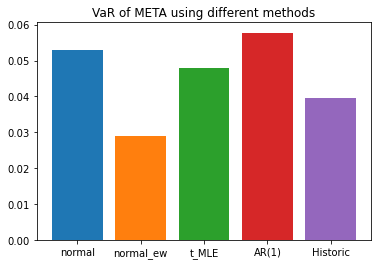

In [18]:
for i in range(len(VaRs)):
    VaR = VaRs[i]
    t = VaR_types[i]
    plt.bar(t, VaR)
plt.title('VaR of META using different methods')
plt.show()

### Problem 3

In [19]:
# Read data from csv file
portfolio = pd.read_csv('portfolio.csv')
portfolio

,Portfolio,Stock,Holding
0,A,AAPL,158
1,A,MSFT,178
2,A,AMZN,110
3,A,NVDA,54
4,A,GOOGL,69
...,...,...,...
95,C,LRCX,194
96,C,ZTS,121
97,C,C,83
98,C,BSX,188


##### Helper functions

In [20]:
# helper function for computing portfolio value and weights for historical values
def compute_PV_weights(portfolio, prices):
    weights = []
    pv = 0
    for stock in portfolio['Stock']:
        holding = portfolio[portfolio['Stock'] == stock]['Holding'].iloc[0]
        curr_price = prices[stock].iloc[-1]
        pv += holding*curr_price
        weights.append(holding*curr_price)
    weights = np.array(weights)/pv
    return pv, weights

##### Use arithmetic return

In [21]:
portfolio_names = ['A', 'B', 'C', 'all']

VaR_tot = 0
z_score = 1.645 # z_score for α=0.05
for portfolio_name in portfolio_names:
    if portfolio_name == 'all': portfolio_sub = portfolio
    else: portfolio_sub = portfolio[portfolio['Portfolio'] == portfolio_name]
    pv, weights = compute_PV_weights(portfolio_sub, dailyPrices)
    prices_sub = dailyPrices[['Date']+[stock for stock in portfolio_sub['Stock']]]
    returns = return_calculate(prices_sub, method='DISCRETE')
    returns.drop('Date', axis=1, inplace=True)
    ew_cov_matrix = compute_ew_cov_matrix(returns, _lambda=0.94)
    VaR = pv*z_score*np.sqrt(weights@ew_cov_matrix@weights.T)
    VaR_tot += VaR
    if portfolio_name == 'all':  print(f'VaR for all portfolios is ${VaR}')
    else: print(f'VaR for Portfolio {portfolio_name} is ${VaR}')

/Users/wuyilun/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/wuyilun/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


VaR for Portfolio A is $15428.34083967705
VaR for Portfolio B is $8083.291658237065


/Users/wuyilun/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/var/folders/rj/ltb_h3dn55jbxjk2_5f94x9r0000gn/T/ipykernel_5173/3656648412.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[vars[i]] = p2[:, i]


VaR for Portfolio C is $18164.90794304415
VaR for all portfolios is $38944.84106331548


/Users/wuyilun/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


##### Use log return

In [22]:
portfolio_names = ['A', 'B', 'C', 'all']

VaR_tot = 0
z_score = 1.645 # z_score for α=0.05
for portfolio_name in portfolio_names:
    if portfolio_name == 'all': portfolio_sub = portfolio
    else: portfolio_sub = portfolio[portfolio['Portfolio'] == portfolio_name]
    pv, weights = compute_PV_weights(portfolio_sub, dailyPrices)
    prices_sub = dailyPrices[['Date']+[stock for stock in portfolio_sub['Stock']]]
    returns = return_calculate(prices_sub, method='LOG')
    returns.drop('Date', axis=1, inplace=True)
    ew_cov_matrix = compute_ew_cov_matrix(returns, _lambda=0.94)
    VaR = pv*z_score*np.sqrt(weights@ew_cov_matrix@weights.T)
    VaR_tot += VaR
    if portfolio_name == 'all':  print(f'VaR for all portfolios is ${VaR}')
    else: print(f'VaR for Portfolio {portfolio_name} is ${VaR}')

/Users/wuyilun/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


VaR for Portfolio A is $15434.888501257756


/Users/wuyilun/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


VaR for Portfolio B is $8090.336124102904


/Users/wuyilun/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


VaR for Portfolio C is $18083.221886197924
VaR for all portfolios is $38908.30449522101


/var/folders/rj/ltb_h3dn55jbxjk2_5f94x9r0000gn/T/ipykernel_5173/3656648412.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[vars[i]] = p2[:, i]
/Users/wuyilun/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
